In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python

In [ ]:
!pip install matplotlib

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

# image classification

removing dodgy images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2

In [ ]:
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/image classification'

In [ ]:
image_extensions = ['png', 'jpg', 'jpeg', 'bmp']

In [ ]:
image_extensions[3]

'bmp'

In [ ]:
os.listdir(data_dir) #returns folder in directory
os.listdir(os.path.join(data_dir, 'sad')) #returns items in the folder in directory

In [ ]:
hap_img = cv2.imread(os.path.join(data_dir, 'happy', '2341-female_smile_math-732x549-thumbnail-732x549.jpg'))
#importing image from directory

In [ ]:
hap_img.shape #checking shape of the image

(549, 732, 3)

In [ ]:
import matplotlib.pyplot as plt

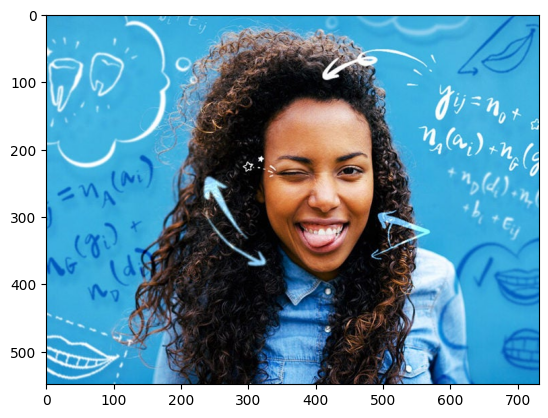

In [ ]:
plt.imshow(cv2.cvtColor(hap_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_classification in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_classification)):
    image_path = os.path.join(data_dir, image_classification, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extensions:
        os.remove(image_path)
    except Exception as e:
          print('Error with image {}'.format(image))
          #os.remove(image_path)

In [ ]:
#tf.data.Dataset?? for help

In [ ]:
import numpy as np

In [ ]:
tf.keras.utils.image_dataset_from_directory??
#tf.keras.utils.image_dataset_from_directory('data', batch_size=10, image_size=(256, 256)) to limit batch size

In [ ]:
os.getcwd()

'/content'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/image classification')

Found 318 files belonging to 2 classes.


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
#len(batch)
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#class = 1 is sad
#class = 0 is happy
batch[1]

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

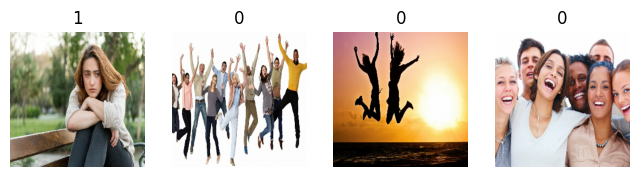

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(8, 8))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].set_title(batch[1][idx])
  ax[idx].axis('off')
plt.show()

# Preprocessing

Scale data

In [ ]:
# batch[0] is for images
# batch[1] is for labels

In [ ]:
# batch[0].max()
scaled = batch [0] / 255
scaled.max()

1.0

In [ ]:
data = data.map(lambda x, y: (x/255, y)) #scaling images to 0-1

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

<h4> Split Data

In [ ]:
len(data)

10

In [ ]:
train_size = int(0.7 * len(data))
val_size = int(0.2  * len(data))
test_size = len(data) - train_size - val_size

In [ ]:
train_size, val_size, test_size

(7, 2, 1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
len(train), len(val), len(test)

(7, 2, 1)

# Deep Neural Network

<h4> Build deep learning model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

<h4> Training

In [ ]:
import datetime
logdir='logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/15
7/7 [==============================] - 29s 1s/step - loss: 0.9132 - accuracy: 0.4911 - val_loss: 0.6562 - val_accuracy: 0.6719
Epoch 2/15
7/7 [==============================] - 15s 1s/step - loss: 0.6683 - accuracy: 0.6027 - val_loss: 0.6175 - val_accuracy: 0.7500
Epoch 3/15
7/7 [==============================] - 15s 1s/step - loss: 0.6032 - accuracy: 0.7009 - val_loss: 0.6605 - val_accuracy: 0.5312
Epoch 4/15
7/7 [==============================] - 17s 2s/step - loss: 0.5157 - accuracy: 0.7723 - val_loss: 0.5239 - val_accuracy: 0.6406
Epoch 5/15
7/7 [==============================] - 15s 1s/step - loss: 0.4708 - accuracy: 0.7768 - val_loss: 0.4391 - val_accuracy: 0.8281
Epoch 6/15
7/7 [==============================] - 17s 2s/step - loss: 0.3714 - accuracy: 0.8527 - val_loss: 0.3314 - val_accuracy: 0.9062
Epoch 7/15
7/7 [==============================] - 15s 1s/step - loss: 0.2621 - accuracy: 0.8750 - val_loss: 0.2226 - val_accuracy: 0.9062
Epoch 8/15
7/7 [==================

In [ ]:
hist

In [ ]:
hist.history

{'loss': [0.913237988948822,
  0.6682634353637695,
  0.6032400131225586,
  0.5156688690185547,
  0.4708297848701477,
  0.3713957965373993,
  0.26210716366767883,
  0.18744805455207825,
  0.18733951449394226,
  0.11070507019758224,
  0.0853419303894043,
  0.05273070186376572,
  0.03628627210855484,
  0.03747379034757614,
  0.23007485270500183],
 'accuracy': [0.4910714328289032,
  0.6026785969734192,
  0.7008928656578064,
  0.7723214030265808,
  0.7767857313156128,
  0.8526785969734192,
  0.875,
  0.9151785969734192,
  0.9285714030265808,
  0.9821428656578064,
  0.9776785969734192,
  0.9821428656578064,
  1.0,
  0.9866071343421936,
  0.9419642686843872],
 'val_loss': [0.6561824083328247,
  0.6175259351730347,
  0.6605066061019897,
  0.5239447355270386,
  0.4390698969364166,
  0.3314206898212433,
  0.22256489098072052,
  0.15187866985797882,
  0.14445894956588745,
  0.0755411833524704,
  0.0173023771494627,
  0.04689721763134003,
  0.017602289095520973,
  0.3336186408996582,
  0.183501392

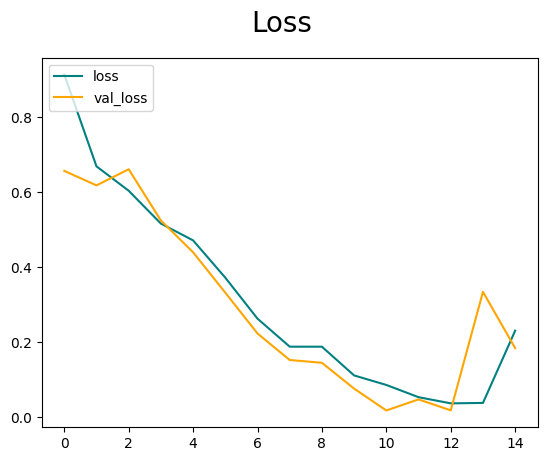

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

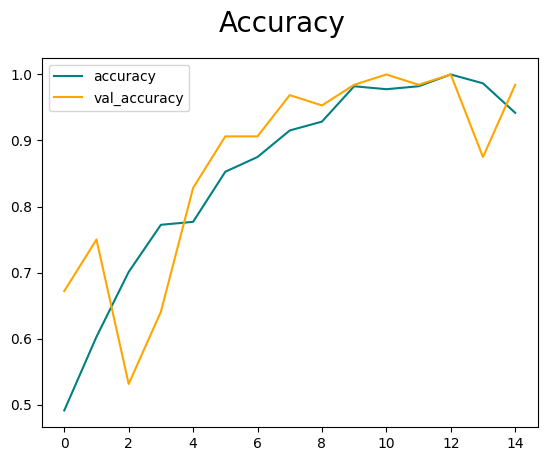

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
prcs = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  prcs.update_state(y, yhat)
  rec.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 414ms/step


In [ ]:
print(f'Precision: {prcs.result().numpy()}, Recall: {rec.result().numpy()} , Accuracy: {acc.result().numpy()}')

Precision: 0.8999999761581421, Recall: 1.0 , Accuracy: 0.9333333373069763


<h4> Test

In [ ]:
img1 = cv2.imread('happy1.jpg')

In [ ]:
import cv2
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

In [ ]:
resize_img = cv2.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

In [ ]:
np.expand_dims(resize_img, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize_img/255, 0))
if yhat > 0.5:
  print(f'sad')
else:
  print(f'happy')
yhat

In [ ]:
img2 = cv2.imread('sad2.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
resize_img2 = cv2.resize(img2, (256, 256))
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.show()

error: ignored

In [ ]:
yhat = model.predict(np.expand_dims(resize_img2/255, 0))
if yhat > 0.5:
  print('sad')
else:
  print('happy')
yhat

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join(/content/drive/MyDrive/models, 'emotionsmodel.h5'))